In [66]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [67]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# traigo mis funciones
import sys

sys.path.append('../src') #pongo los 2 puntos para que salga de la carpeta
import soporte_funciones as sf
import soporte_encoding as se

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from category_encoders import TargetEncoder

pd.set_option('display.max_columns', None)

In [68]:
df = pd.read_csv('../datos_1/df_resultados_sin_out.csv', index_col=0)
df.head()

,price,propertyType,size_stand,exterior,rooms,bathrooms,distance_stand,status,floor,hasLift
0,750.0,flat,0.011443,True,1,1,-0.714088,good,3,True
1,750.0,flat,0.432212,True,2,1,-0.040932,good,bj,False
2,590.0,flat,0.432212,True,3,2,2.948728,good,Desconocido,False
3,684.0,studio,-0.619710,True,0,1,-0.446614,Desconocido,Desconocido,Desconocido
4,600.0,flat,0.558443,True,2,1,1.505006,good,3,False


In [69]:
df['rooms'] = df['rooms'].astype(str)
df['bathrooms'] = df['bathrooms'].astype(str)

In [70]:
df['exterior'] = df['exterior'].astype(str)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 347
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           348 non-null    float64
 1   propertyType    348 non-null    object 
 2   size_stand      348 non-null    float64
 3   exterior        348 non-null    object 
 4   rooms           348 non-null    object 
 5   bathrooms       348 non-null    object 
 6   distance_stand  348 non-null    float64
 7   status          348 non-null    object 
 8   floor           348 non-null    object 
 9   hasLift         348 non-null    object 
dtypes: float64(3), object(7)
memory usage: 29.9+ KB


In [72]:
df_num, df_cat = sf.separar_dataframe(df)

In [73]:
lista_col_categ =  df.select_dtypes(include='O').columns.tolist()

Index(['propertyType', 'exterior', 'rooms', 'bathrooms', 'status', 'floor',
       'hasLift'],
      dtype='object')


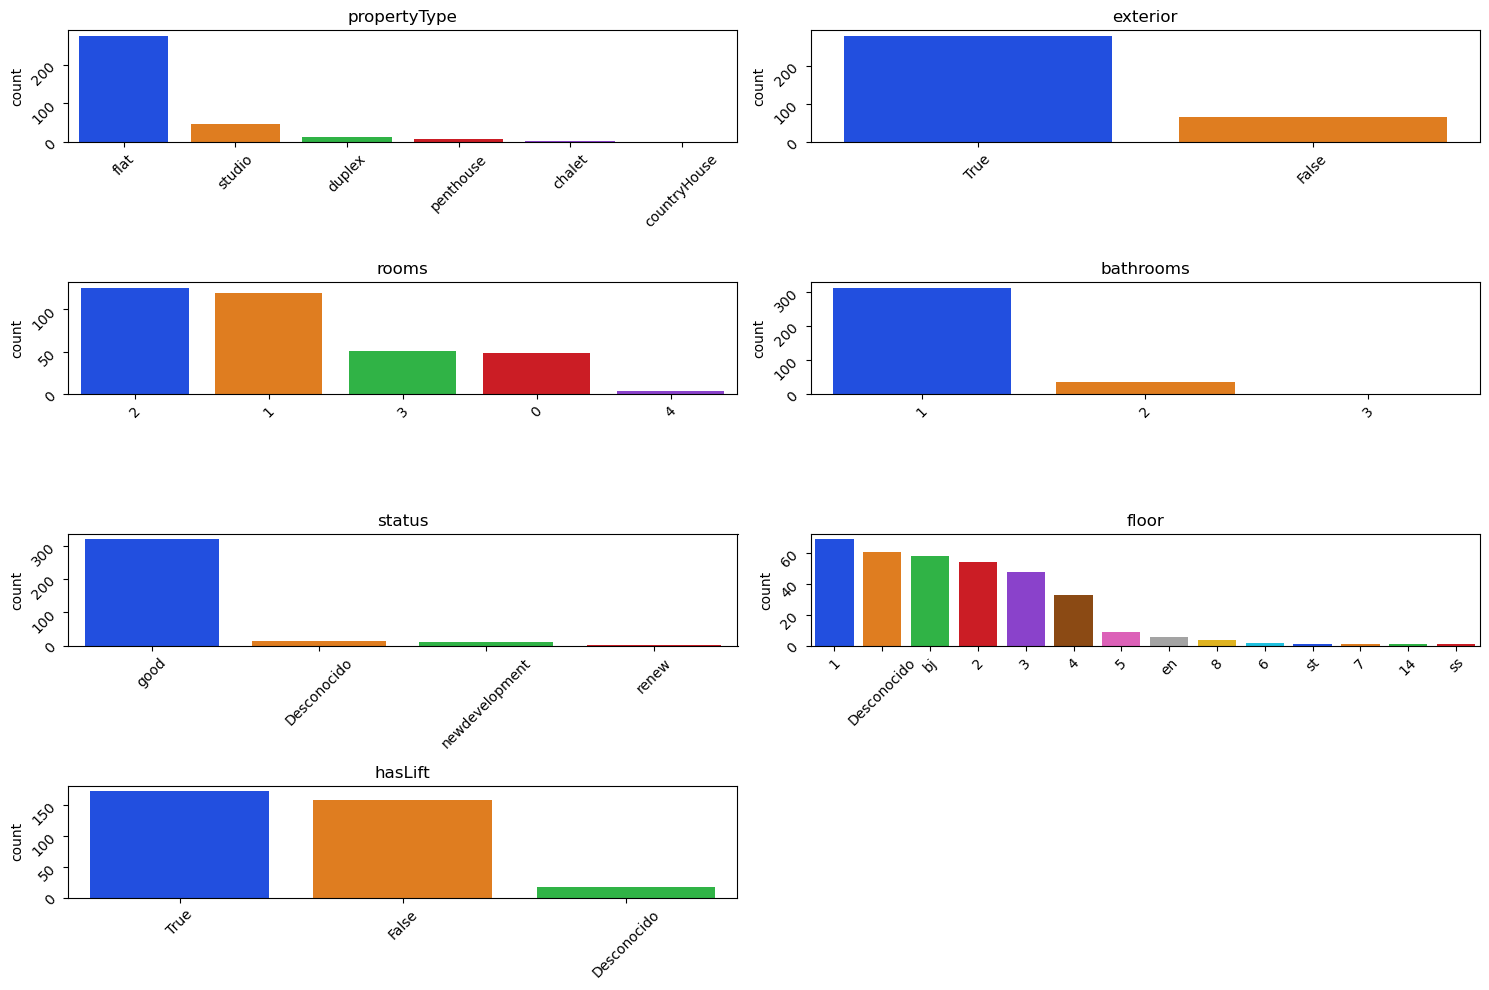

In [74]:
sf.plot_categoricas(df_cat)

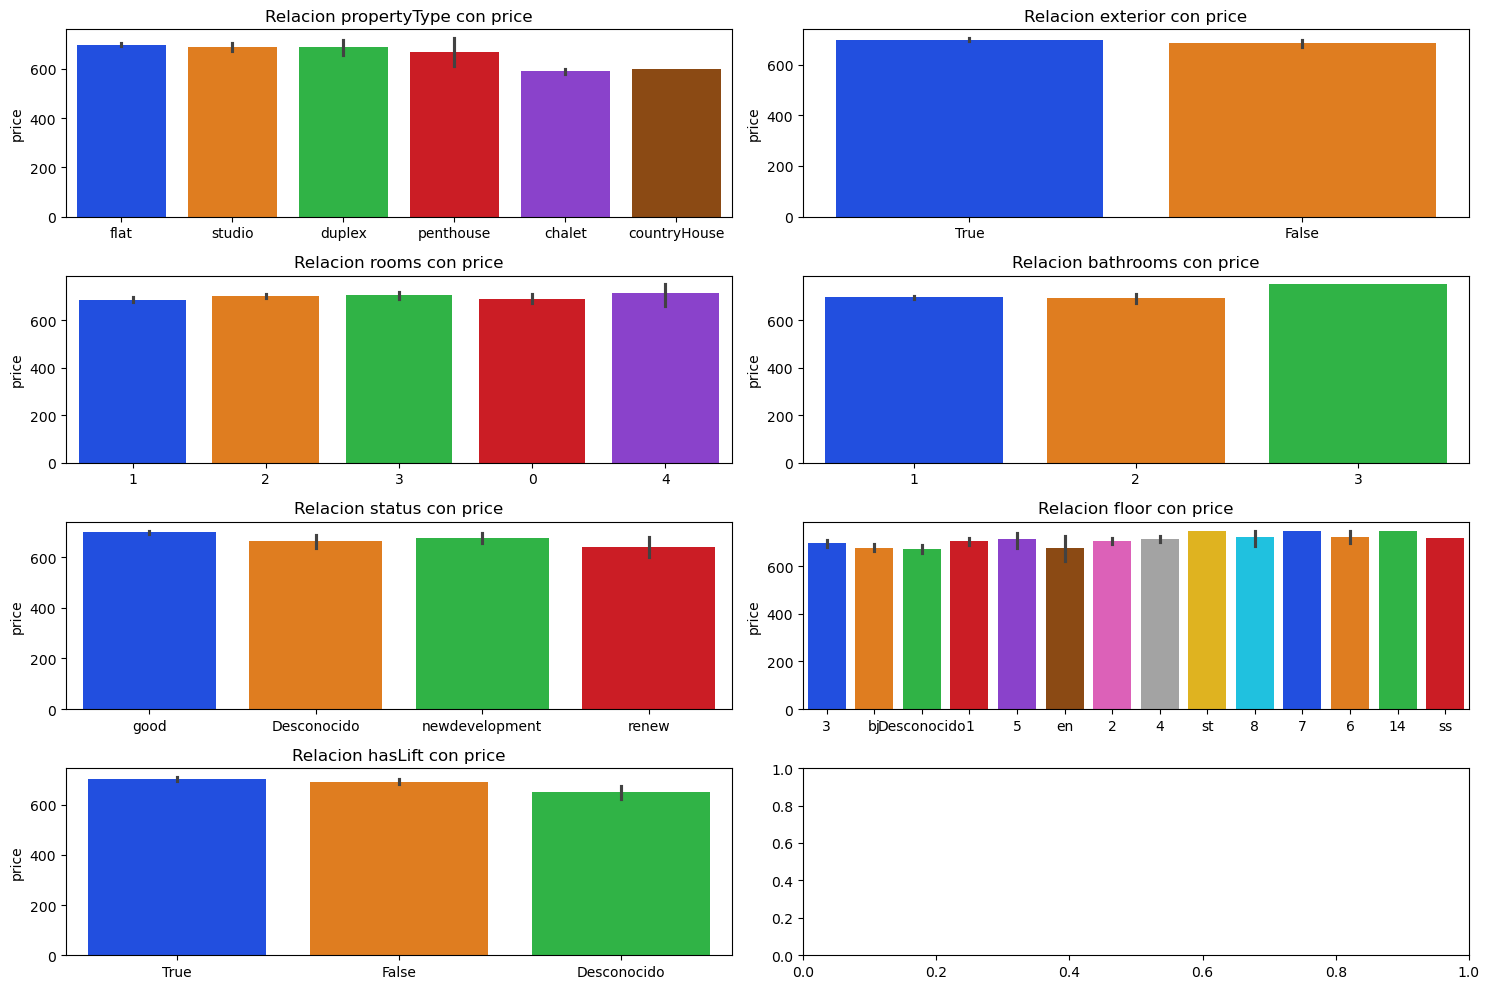

In [75]:
sf.visualizar_categoricas(df, lista_col_categ, 'price', tipo_grafica='barplot')

In [76]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'studio', 'duplex', 'penthouse', 'chalet', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 7.895257757824575
Valor p: 0.16210343540832306
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,10.0000,1.0000,-182.0250,202.0250,chalet-countryHouse
1,99.2857,0.1588,-19.2347,217.8061,chalet-duplex
2,109.2691,0.0576,-1.9990,220.5372,chalet-flat
3,78.6250,0.4555,-45.3266,202.5766,chalet-penthouse
4,99.6250,0.1202,-13.5268,212.7768,chalet-studio
5,89.2857,0.6145,-73.0050,251.5765,countryHouse-duplex
6,99.2691,0.4598,-57.8035,256.3417,countryHouse-flat
7,68.6250,0.8450,-97.6735,234.9235,countryHouse-penthouse
8,89.6250,0.5849,-68.7875,248.0375,countryHouse-studio
9,9.9834,0.9855,-32.9733,52.9401,duplex-flat



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 10463.5
Valor p: 0.1524459789290089
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,13.6156,0.0708,-1.1624,28.3935,False-True



###########################

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3', '0', '4']

Realizando test de Kruskal...
Estadístico de prueba: 7.09022629420094
Valor p: 0.13119631038550097
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-4.2941,0.9909,-29.9730,21.3848,0-1
1,11.2460,0.7451,-14.2240,36.7161,0-2
2,15.4566,0.6277,-14.8063,45.7195,0-3
3,22.4762,0.9596,-67.5019,112.4543,0-4
4,15.5401,0.1807,-3.7981,34.8784,1-2
5,19.7507,0.2060,-5.5691,45.0705,1-3
6,26.7703,0.9212,-61.6678,115.2084,1-4
7,4.2106,0.9908,-20.8973,29.3184,2-3
8,11.2302,0.9968,-77.1475,99.6079,2-4
9,7.0196,0.9995,-82.8566,96.8958,3-4



###########################

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3']

Realizando test de Kruskal...
Estadístico de prueba: 1.7819379708181846
Valor p: 0.4102580260465759
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-4.9485,0.8713,-28.2404,18.3434,1-2
1,53.7372,0.5985,-77.1348,184.6091,1-3
2,58.6857,0.5506,-73.8305,191.2019,2-3



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'Desconocido', 'newdevelopment', 'renew']

Realizando test de Kruskal...
Estadístico de prueba: 12.723706849718745
Valor p: 0.005273849050501517
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,36.1106,0.0775,-2.6059,74.8271,Desconocido-good
1,13.8791,0.9134,-40.7318,68.4900,Desconocido-newdevelopment
2,-22.4286,0.9491,-129.6086,84.7515,Desconocido-renew
3,-22.2315,0.4811,-62.3491,17.8861,good-newdevelopment
4,-58.5392,0.4370,-159.1107,42.0324,good-renew
5,-36.3077,0.8202,-144.0018,71.3864,newdevelopment-renew



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', 'Desconocido', '1', '5', 'en', '2', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de Kruskal...
Estadístico de prueba: 31.930678198713128
Valor p: 0.002459774359215061
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,44.5942,0.9999,-139.4119,228.6003,1-14
1,0.3535,1.0000,-32.8390,33.5459,1-2
2,-7.4266,1.0000,-41.7631,26.9098,1-3
3,10.2003,0.9998,-28.4655,48.8660,1-4
4,9.0386,1.0000,-55.7068,73.7841,1-5
...,...,...,...,...,...
86,41.6552,1.0000,-142.6000,225.9104,bj-ss
87,71.6552,0.9894,-112.6000,255.9104,bj-st
88,40.8333,1.0000,-156.4912,238.1579,en-ss
89,70.8333,0.9950,-126.4912,268.1579,en-st



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'Desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 12.818434683718154
Valor p: 0.0016463124978535833
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,42.2267,0.0071,9.5691,74.8844,Desconocido-False
1,53.3312,0.0004,20.8113,85.8510,Desconocido-True
2,11.1044,0.1531,-2.9749,25.1838,False-True



###########################



In [ ]:
diccionario_encoding = {"onehot": ['propertyType', ''], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : {
                                    },
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ["", "", "", ""]
                        }

In [78]:
encoding = se.Encoding(df, diccionario_encoding, "price")
df_encode = encoding.one_hot_encoding()
df_encode.head()

,price,propertyType,size_stand,exterior,rooms,bathrooms,distance_stand,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio
0,750.0,flat,0.011443,True,1,1,-0.714088,good,3,True,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,flat,0.432212,True,2,1,-0.040932,good,bj,False,0.0,0.0,0.0,1.0,0.0,0.0
2,590.0,flat,0.432212,True,3,2,2.948728,good,Desconocido,False,0.0,0.0,0.0,1.0,0.0,0.0
3,684.0,studio,-0.619710,True,0,1,-0.446614,Desconocido,Desconocido,Desconocido,0.0,0.0,0.0,0.0,0.0,1.0
4,600.0,flat,0.558443,True,2,1,1.505006,good,3,False,0.0,0.0,0.0,1.0,0.0,0.0
